In [190]:
from bs4 import BeautifulSoup
import requests
from csv import writer
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
  
with open('cars.csv', 'w', encoding='utf8', newline='') as f:
    thewriter = writer(f)
    header = ['Name', 'Location', 'Price','Monthly Payment', 'Milage (KM)','Ownership','Transmission']
    thewriter.writerow(header)
    for pagenum in range(1,500):

        url= "https://www.autotrader.co.za/cars-for-sale/gauteng/johannesburg/parktown/s-4390?pagenumber="+ str(pagenum)+"&radius=50&priceoption=RetailPrice"
        page = requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')
        lists = soup.find_all('span', class_="e-details")
        for list in lists:
            #total price
            price = list.find('span', class_="e-price")
            if price is not None:
                price=price.text
            #name of car
            name = list.find('span', class_="e-title")
            if name is not None:
                name=name.text
            #monthly installments
            monthlyPayment = list.find('span', class_="e-estimated-payment")
            if monthlyPayment is not None:
                monthlyPayment=monthlyPayment.text
            #location
            location = list.find('span', class_="e-suburb")
            if location is not None:
                location=location.text
            
            if len(list.find_all('li', class_="e-summary-icon"))==3:
                preOwned = list.find_all('li', class_="e-summary-icon")[0]
                if preOwned is not None:
                    preOwned=preOwned.text
                
                milage = list.find_all('li', class_="e-summary-icon")[1]
                if milage is not None:
                    milage=milage.text
                
                transmission = list.find_all('li', class_="e-summary-icon")[2]
                if transmission is not None:
                    transmission=transmission.text

            #extract the link so you can click on the car you like
                    
            info =[name,location,price,monthlyPayment,milage,preOwned,transmission]
            thewriter.writerow(info)

In [100]:
def extractYear(fullname):
    return int(fullname.split(" ")[0])
def extractMake(fullname):
    return fullname.split(" ")[1]
def extractModel(fullname):
    return fullname.split(" ")[2]
def removeNoneDigit(fullname):
    return int(re.sub('[^0-9]','', fullname))
def extractSuburb(fullname):
    return fullname.split(",")[0]
def extractCity(fullname):
    return fullname.split(",")[1]


In [101]:
carcsv=pd.read_csv('cars.csv')
carcsv=carcsv.dropna(axis = 0, subset=['Name','Location','Price','Monthly Payment','Milage (KM)'])
carcsv['Year']=carcsv['Name'].apply(extractYear)
carcsv['Make']=carcsv['Name'].apply(extractMake)
carcsv['City']=carcsv['Location'].apply(extractCity)
carcsv['Suburb']=carcsv['Location'].apply(extractSuburb)
carcsv['Model']=carcsv['Name'].apply(extractModel)
carcsv['Milage (KM)']=carcsv['Milage (KM)'].apply(removeNoneDigit)
carcsv['Price']=carcsv['Price'].apply(removeNoneDigit)
carcsv['Monthly Payment']=carcsv['Monthly Payment'].apply(removeNoneDigit)
carcsv.reset_index(drop=True, inplace=True)
carcsv

,Name,Location,Price,Monthly Payment,Milage (KM),Ownership,Transmission,Year,Make,City,Suburb,Model
0,2022 Rolls-Royce Cullinan Black Badge,"Morningside, Sandton",15999995,304545,100,Used Car,Automatic,2022,Rolls-Royce,Sandton,Morningside,Cullinan
1,2022 Ferrari SF90 Stradale,"Benoni Industrial, Benoni",13999999,266477,300,Used Car,Automatic,2022,Ferrari,Benoni,Benoni Industrial,SF90
2,2022 Rolls-Royce Ghost Black Badge,"Melrose North, Johannesburg",13800000,262670,100,Used Car,Automatic,2022,Rolls-Royce,Johannesburg,Melrose North,Ghost
3,2022 Rolls-Royce Ghost Ghost,"Melrose North, Johannesburg",12500000,237926,100,Used Car,Automatic,2022,Rolls-Royce,Johannesburg,Melrose North,Ghost
4,2021 Ferrari 812 GTS,"Morningside, Sandton",10999995,209375,3000,Used Car,Automatic,2021,Ferrari,Sandton,Morningside,812
...,...,...,...,...,...,...,...,...,...,...,...,...
9905,2012 MINI Hatch John Cooper Works,"Paulshof, Sandton",289950,5519,97000,Used Car,Manual,2012,MINI,Sandton,Paulshof,Hatch
9906,2019 Isuzu D-Max 250 Fleetside Safety,"Raceview, Alberton",289950,5519,96900,Used Car,Manual,2019,Isuzu,Alberton,Raceview,D-Max
9907,2016 BMW 3 Series 320i Sport Line Auto,"Raceview, Alberton",289950,5519,151600,Used Car,Automatic,2016,BMW,Alberton,Raceview,3
9908,2020 Ford EcoSport 1.5TDCi Ambiente,"Raceview, Alberton",289950,5519,39900,Used Car,Manual,2020,Ford,Alberton,Raceview,EcoSport


<AxesSubplot:xlabel='Year', ylabel='Milage (KM)'>

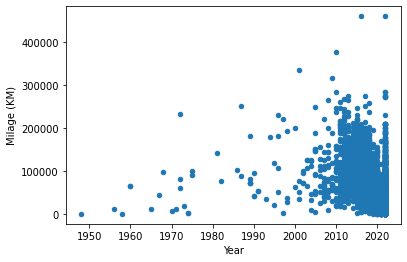

In [169]:
carcsv.plot.scatter(y='Milage (KM)',x='Year')

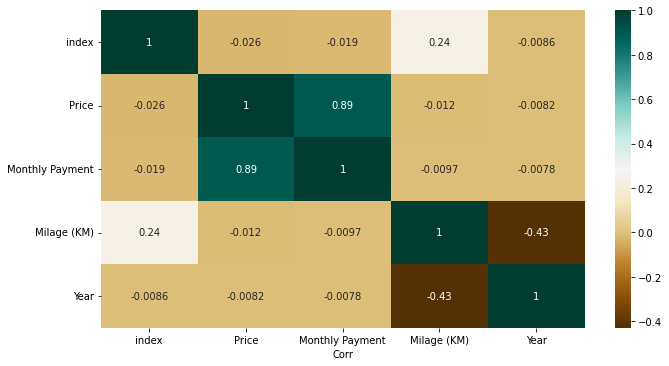

In [90]:
figure = plt.figure(figsize=(10, 5))
sns.heatmap(carcsv.corr(), annot=True,cmap='BrBG')
plt.tight_layout()
plt.xlabel('Corr')
plt.show()

<AxesSubplot:xlabel='Year'>

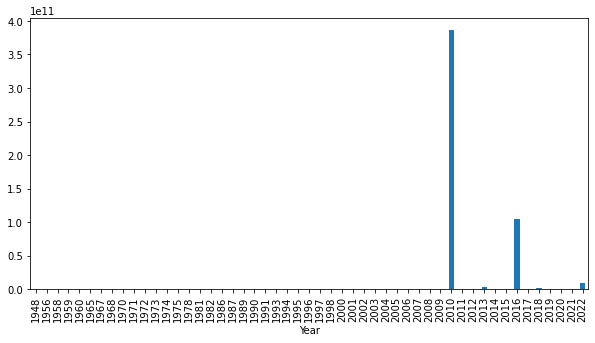

In [91]:
plt.figure(figsize=(10, 5))
carcsv.groupby('Year')['Price'].mean().plot.bar()

In [92]:
maxindex=carcsv['Price'].idxmax()
carcsv.iloc[maxindex]

index                                   118
Name               2016 Ferrari 488 488 GTB
Location            Corporate Park, Midrand
Price                        49950005395000
Monthly Payment                 95075102689
Milage (KM)                            1767
Ownership                          Used Car
Transmission                      Automatic
Year                                   2016
Make                                Ferrari
Model                                   488
Name: 66, dtype: object

In [94]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [103]:
carcsv=remove_outlier(carcsv,'Price')
carcsv

,Name,Location,Price,Monthly Payment,Milage (KM),Ownership,Transmission,Year,Make,City,Suburb,Model
1022,2021 Land Rover Defender 90 D300 X-Dynamic HSE,"Morningside, Sandton",1539000,29293,31000,Used Car,Automatic,2021,Land,Sandton,Morningside,Rover
1023,2022 Lexus RX 450h SE,"Magaliessig, Sandton",1537100,29257,31000,Used Car,Automatic,2022,Lexus,Sandton,Magaliessig,RX
1024,2022 Lexus RX 450h SE,"Magaliessig, Sandton",1537100,29257,31000,Used Car,Automatic,2022,Lexus,Sandton,Magaliessig,RX
1025,2022 Lexus RX 450h SE,"Magaliessig, Sandton",1537100,29257,36,Used Car,Automatic,2022,Lexus,Sandton,Magaliessig,RX
1026,2022 Toyota Land Cruiser 79 4.5D-4D LX V8 Doub...,"Fourways, Sandton",1535000,29217,3000,Used Car,Manual,2022,Toyota,Sandton,Fourways,Land
...,...,...,...,...,...,...,...,...,...,...,...,...
9905,2012 MINI Hatch John Cooper Works,"Paulshof, Sandton",289950,5519,97000,Used Car,Manual,2012,MINI,Sandton,Paulshof,Hatch
9906,2019 Isuzu D-Max 250 Fleetside Safety,"Raceview, Alberton",289950,5519,96900,Used Car,Manual,2019,Isuzu,Alberton,Raceview,D-Max
9907,2016 BMW 3 Series 320i Sport Line Auto,"Raceview, Alberton",289950,5519,151600,Used Car,Automatic,2016,BMW,Alberton,Raceview,3
9908,2020 Ford EcoSport 1.5TDCi Ambiente,"Raceview, Alberton",289950,5519,39900,Used Car,Manual,2020,Ford,Alberton,Raceview,EcoSport


<AxesSubplot:xlabel='Year'>

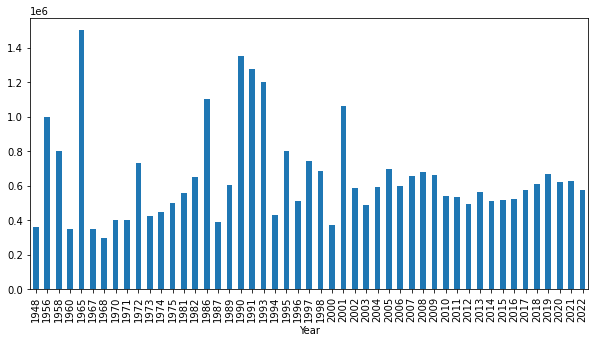

In [104]:
plt.figure(figsize=(10, 5))
carcsv.groupby('Year')['Price'].mean().plot.bar()

<AxesSubplot:xlabel='City', ylabel='Price'>

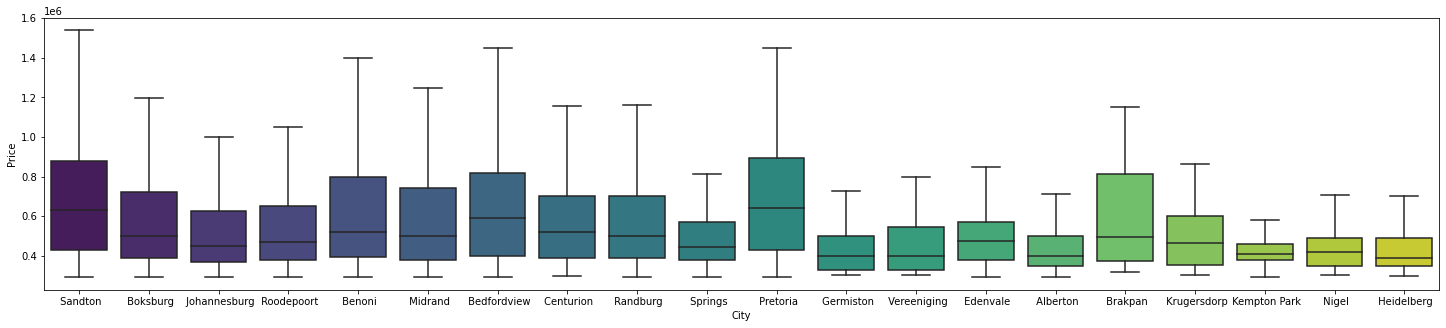

In [121]:
plt.figure(figsize=(25, 5))
sns.boxplot(x=carcsv['City'],y=carcsv['Price'],showfliers=False, palette="viridis")

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

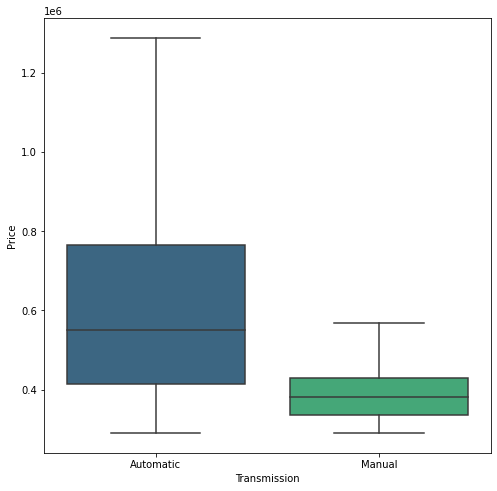

In [170]:
plt.figure(figsize=(8, 8))
sns.boxplot(x=carcsv['Transmission'],y=carcsv['Price'],showfliers=False, palette="viridis")

<AxesSubplot:xlabel='Milage (KM)', ylabel='Density'>

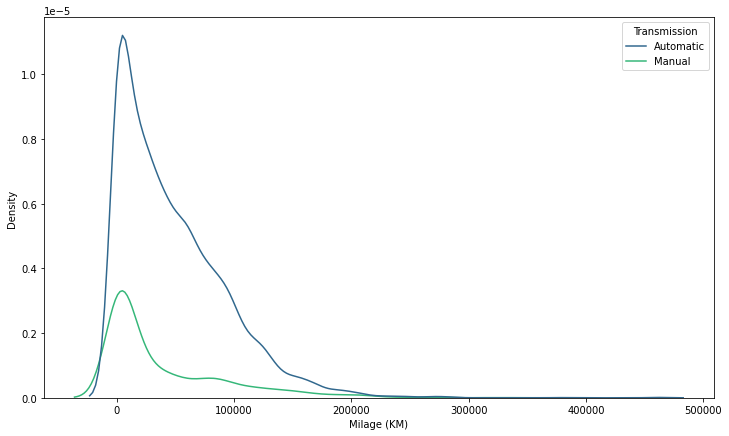

In [147]:
plt.figure(figsize=(12, 7))
sns.kdeplot(data=carcsv,x='Milage (KM)',hue='Transmission', palette="viridis")

<AxesSubplot:xlabel='Ownership', ylabel='Price'>

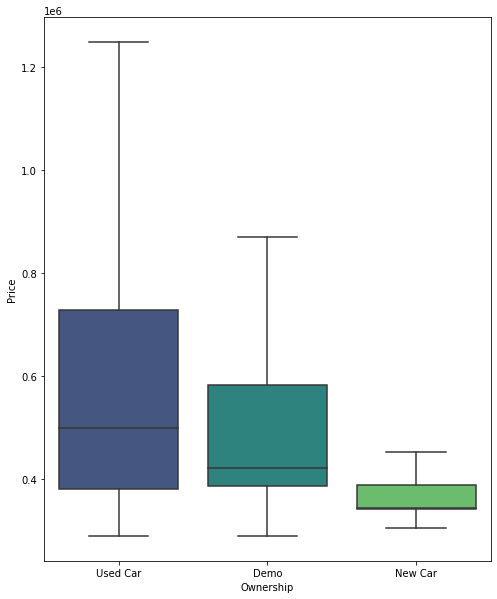

In [197]:
plt.figure(figsize=(8, 10))
# plt.yticks(np.arange(0, carcsv['Price'].max(), 200000))
sns.boxplot(x=carcsv['Ownership'],y=carcsv['Price'],showfliers=False, palette="viridis")


In [198]:
carcsv['Ownership']

1022    Used Car
1023    Used Car
1024    Used Car
1025    Used Car
1026    Used Car
          ...   
9905    Used Car
9906    Used Car
9907    Used Car
9908    Used Car
9909    Used Car
Name: Ownership, Length: 8879, dtype: object

<AxesSubplot:ylabel='Make'>

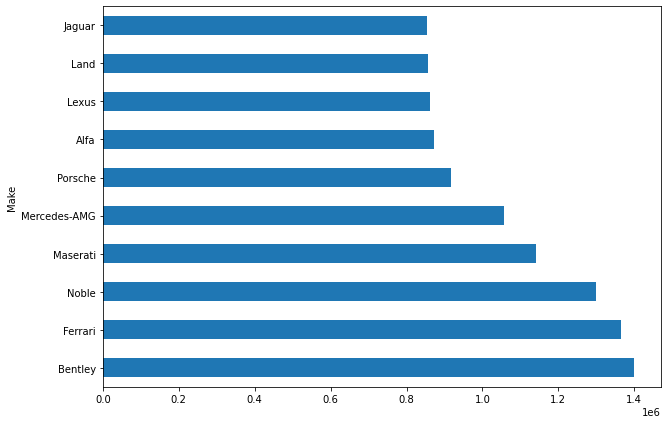

In [150]:
plt.figure(figsize=(10, 7))
carcsv.groupby('Make')['Price'].mean().nlargest(10).plot.barh()

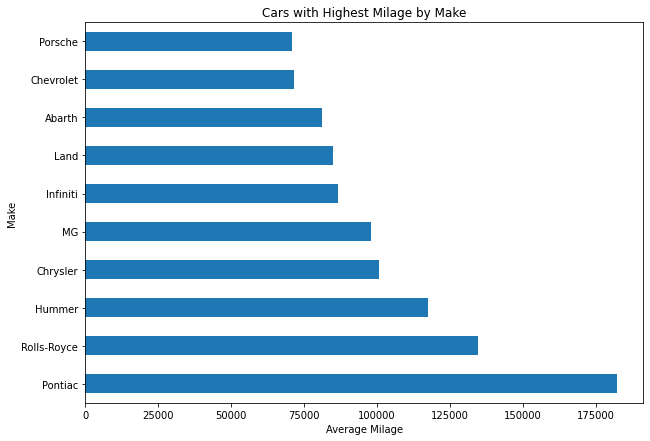

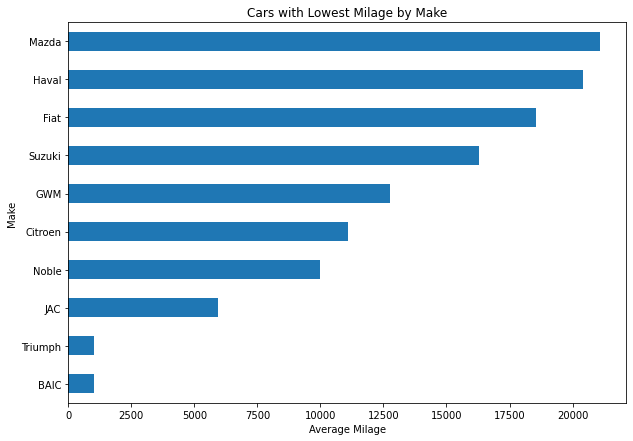

In [174]:
plt.figure(figsize=(10, 7))
plt.title("Cars with Highest Milage by Make")
plt.xlabel('Average Milage')
ax1= carcsv.groupby('Make')['Milage (KM)'].mean().nlargest(10).plot.barh()

plt.figure(figsize=(10, 7))
plt.title("Cars with Lowest Milage by Make")
plt.xlabel('Average Milage')
ax2= carcsv.groupby('Make')['Milage (KM)'].mean().nsmallest(10).plot.barh()

<AxesSubplot:xlabel='Make', ylabel='Milage (KM)'>

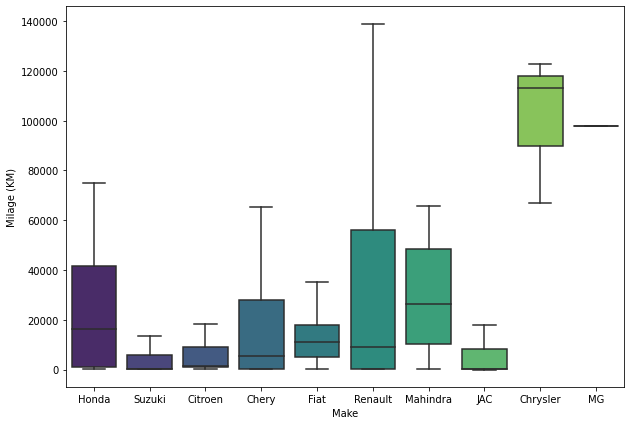

In [199]:
cheapestCars=carcsv.groupby('Make')['Price'].mean().nsmallest(10).keys().tolist()
plt.figure(figsize=(10, 7))
sns.boxplot(x=carcsv[carcsv['Make'].isin(cheapestCars)]['Make'],y=carcsv['Milage (KM)'],showfliers=False, palette="viridis")

<AxesSubplot:xlabel='Make', ylabel='Milage (KM)'>

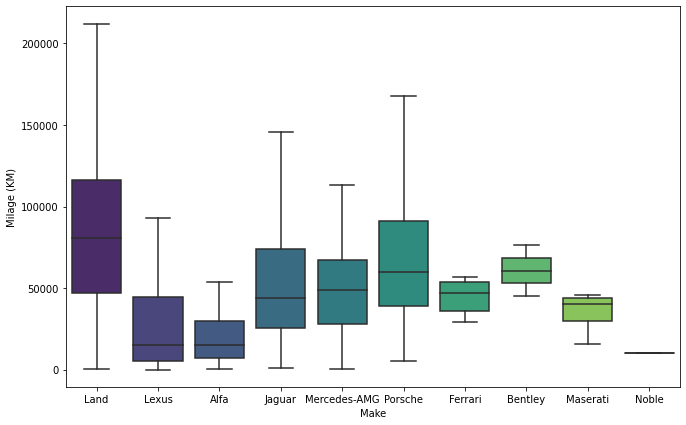

In [201]:
expensiveCars=carcsv.groupby('Make')['Price'].mean().nlargest(10).keys().tolist()
plt.figure(figsize=(11, 7))
sns.boxplot(x=carcsv[carcsv['Make'].isin(expensiveCars)]['Make'],y=carcsv['Milage (KM)'],showfliers=False, palette="viridis")